In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orig_patients_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/patients.csv")
orig_claims_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/claims.csv")
orig_payers_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/payers.csv")
orig_providers_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/providers.csv")
orig_revenue_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/revenue.csv")
orig_externalfact_df = pd.read_csv("C:/Users/kandu/Documents/Data Analysis Projects/Claims Denial Prediction/data/raw/external_factors.csv")

In [3]:
print(orig_patients_df.info())
print(orig_claims_df.info())
print(orig_payers_df.info())
print(orig_providers_df.info())
print(orig_revenue_df.info())
print(orig_externalfact_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PatientID      10000 non-null  object
 1   Age            10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   City           10000 non-null  object
 4   State          10000 non-null  object
 5   InsuranceType  10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ClaimID         50000 non-null  object 
 1   PatientID       50000 non-null  object 
 2   PayerID         50000 non-null  object 
 3   ProviderID      50000 non-null  object 
 4   ClaimAmount     50000 non-null  float64
 5   Reimbursement   50000 non-null  float64
 6   DenialStatus    50

In [4]:
print(orig_patients_df.describe())
print(orig_claims_df.describe())
print(orig_payers_df.describe())
print(orig_revenue_df.describe())
print(orig_externalfact_df.describe())

                Age
count  10000.000000
mean      53.418300
std       20.795893
min       18.000000
25%       35.000000
50%       53.000000
75%       71.000000
max       89.000000
        ClaimAmount  Reimbursement
count  50000.000000   50000.000000
mean    5088.861337    1943.359486
std     2826.382597    2203.874252
min      200.050000       0.000000
25%     2639.312500      75.045000
50%     5089.140000    1105.595000
75%     7533.352500    3130.195000
max     9999.730000    9926.060000
       ReimbursementRate
count          50.000000
mean            0.749800
std             0.148825
min             0.510000
25%             0.632500
50%             0.720000
75%             0.870000
max             1.000000
       TotalRevenue  ClaimsProcessed  PatientsServed
count  3.600000e+01        36.000000       36.000000
mean   4.752308e+06      1388.888889     1295.000000
std    7.326048e+05       211.776672      192.791671
min    7.774786e+05       240.000000      239.000000
25%    4.761476

In [5]:
print(orig_patients_df.head())
print(orig_claims_df.head())
print(orig_payers_df.head())
print(orig_providers_df.head())
print(orig_revenue_df.head())
print(orig_externalfact_df.head())

  PatientID  Age  Gender          City State InsuranceType
0    P00001   72    Male    Chavezfurt    SC    Government
1    P00002   53  Female   Hollandview    MN       Private
2    P00003   54  Female  Port Lindsey    NM    Government
3    P00004   31  Female   Travismouth    IN       Private
4    P00005   44    Male  Barrychester    KS    Government
   ClaimID PatientID PayerID ProviderID  ClaimAmount  Reimbursement  \
0  C000001    P02949   PY039     PR0388      3870.49        1052.79   
1  C000002    P03936   PY038     PR0253      9517.00        7885.48   
2  C000003    P06831   PY033     PR0244      7373.54           0.00   
3  C000004    P03710   PY042     PR0038      6066.85        5590.40   
4  C000005    P01290   PY023     PR0014      1728.98         379.85   

  DenialStatus ServiceDate SubmissionDate ProcessedDate  
0           No    9/3/2022      10/1/2022     10/8/2022  
1           No   12/6/2022     12/15/2022    12/22/2022  
2          Yes   11/5/2023      11/8/2023    

In [6]:
patients_df = orig_patients_df.copy()
claims_df = orig_claims_df.copy()
payers_df = orig_payers_df.copy()
providers_df = orig_providers_df.copy()
revenue_df = orig_revenue_df.copy()
externalfact_df = orig_externalfact_df.copy()

In [7]:
#Convert to datetime
claims_df['ServiceDate'] = pd.to_datetime(claims_df['ServiceDate'])
claims_df['SubmissionDate'] = pd.to_datetime(claims_df['SubmissionDate'])
claims_df['ProcessedDate'] = pd.to_datetime(claims_df['ProcessedDate'])

In [8]:
# Convert to datetime
revenue_df['MonthID'] = pd.to_datetime(revenue_df['MonthID'], format='%Y-%m')
externalfact_df['MonthID'] = pd.to_datetime(externalfact_df['MonthID'], format='%Y-%m')

# Convert to Period (Year-Month)
revenue_df['MonthID'] = revenue_df['MonthID'].dt.to_period('M')
externalfact_df['MonthID'] = externalfact_df['MonthID'].dt.to_period('M')

In [9]:
print(revenue_df.head())

   MonthID  TotalRevenue  ClaimsProcessed  PatientsServed
0  2022-01     777478.64              240             239
1  2022-02    3840660.15             1097            1045
2  2022-03    4812872.62             1471            1361
3  2022-04    5000918.17             1485            1371
4  2022-05    5278201.83             1556            1444


In [10]:
#Handling missing values
print(patients_df.isnull().sum())
print(claims_df.isnull().sum())
print(payers_df.isnull().sum())
print(providers_df.isnull().sum())
print(revenue_df.isnull().sum())
print(externalfact_df.isnull().sum())

PatientID        0
Age              0
Gender           0
City             0
State            0
InsuranceType    0
dtype: int64
ClaimID           0
PatientID         0
PayerID           0
ProviderID        0
ClaimAmount       0
Reimbursement     0
DenialStatus      0
ServiceDate       0
SubmissionDate    0
ProcessedDate     0
dtype: int64
PayerID              0
PayerName            0
PayerCategory        0
ReimbursementRate    0
dtype: int64
ProviderID      0
ProviderName    0
Specialty       0
City            0
State           0
dtype: int64
MonthID            0
TotalRevenue       0
ClaimsProcessed    0
PatientsServed     0
dtype: int64
MonthID           0
InflationRate     0
PublicEvents     25
PolicyChanges    31
dtype: int64


In [11]:
#Filling null values 
externalfact_df['PublicEvents'] = externalfact_df['PublicEvents'].fillna("No Events")
externalfact_df['PolicyChanges'] = externalfact_df['PolicyChanges'].fillna("No Changes")

In [12]:
#Duplicate values
print(patients_df.duplicated().sum())
print(claims_df.duplicated().sum())
print(payers_df.duplicated().sum())
print(providers_df.duplicated().sum())
print(revenue_df.duplicated().sum())
print(externalfact_df.duplicated().sum())

0
0
0
0
0
0


In [13]:
#Data validation
claims_df = claims_df[claims_df['PatientID'].isin(patients_df['PatientID'])]
claims_df = claims_df[claims_df['PayerID'].isin(payers_df['PayerID'])]
claims_df = claims_df[claims_df['ProviderID'].isin(providers_df['ProviderID'])]
claims_df = claims_df[claims_df['ServiceDate']<claims_df['SubmissionDate']]
claims_df = claims_df[claims_df['SubmissionDate']<claims_df['ProcessedDate']]
claims_df = claims_df[claims_df['ClaimAmount']>=claims_df['Reimbursement']]

In [14]:
claims_df.shape

(50000, 10)

In [15]:
deniedreimbursement = claims_df['Reimbursement'].where(claims_df['DenialStatus'] == 'Yes')

In [16]:
deniedreimbursement.unique()

array([nan,  0.])

In [17]:
claims_yearly = claims_df.groupby(claims_df['ProcessedDate'].dt.year)['ClaimID'].count()
revenueclaims_yearly = revenue_df.groupby(revenue_df['MonthID'].dt.year)['ClaimsProcessed'].sum()

In [18]:
#Claims validation across claims and revenue tables
print("Claims table count:",claims_yearly)
print("Revenue table count:",revenueclaims_yearly)

Claims table count: ProcessedDate
2022    15725
2023    17216
2024    17059
Name: ClaimID, dtype: int64
Revenue table count: MonthID
2022    15725
2023    17216
2024    17059
Name: ClaimsProcessed, dtype: int64


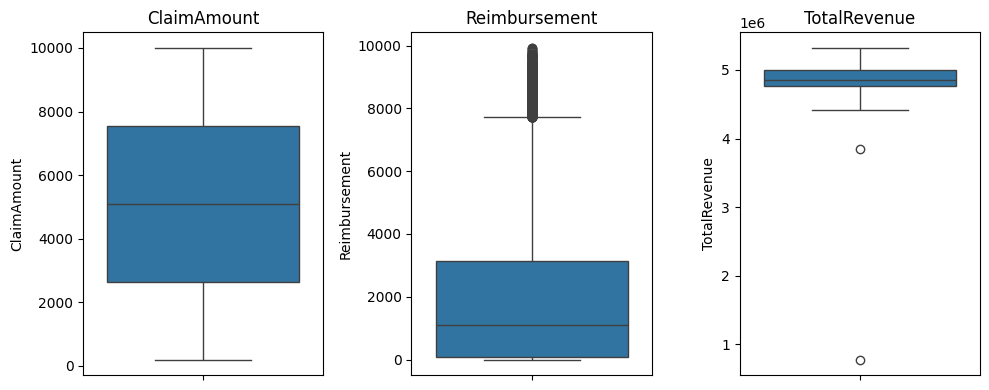

In [19]:
# #Outlier Detection

# fig,axes= plt.subplots(1,3,figsize = (10,4))

# sns.boxplot(y='ClaimAmount',data=claims_df,ax=axes[0])
# axes[0].set_title('ClaimAmount')
# sns.boxplot(y='Reimbursement',data=claims_df,ax=axes[1])
# axes[1].set_title('Reimbursement')
# sns.boxplot(y='TotalRevenue',data=revenue_df,ax=axes[2])
# axes[2].set_title('TotalRevenue')

# plt.tight_layout()
# plt.show()

In [20]:
#Feature Engineering

claims_df['SubmissionQuarter'] = claims_df['SubmissionDate'].dt.quarter
claims_df['SubmissionMonth'] = claims_df['SubmissionDate'].dt.month
claims_df['SubmissionWeekday'] = claims_df['SubmissionDate'].dt.weekday
claims_df['ProcessedQuarter'] = claims_df['ProcessedDate'].dt.quarter
claims_df['ProcessedMonth'] = claims_df['ProcessedDate'].dt.month
claims_df['ProcessedWeekday'] = claims_df['ProcessedDate'].dt.weekday

In [21]:
claims_df = claims_df.merge(payers_df[['PayerID','ReimbursementRate']],on='PayerID',how='left')
claims_df.rename(columns={'ReimbursementRate':'Payer_ReimbursementRate'},inplace=True)

In [22]:
claims_df['ClaimValueProportion'] = (claims_df['Reimbursement']/claims_df['ClaimAmount']).round(2)
claims_df['SubmissionDelay'] = (claims_df['SubmissionDate'] - claims_df['ServiceDate']).dt.days
claims_df['ProcessingDelay'] = (claims_df['ProcessedDate'] - claims_df['SubmissionDate']).dt.days

In [23]:
#claims_df['DelayRatio'] = (claims_df['SubmissionDelay']/claims_df['ProcessingDelay']).round(2)
claims_df['CTR_Ratio'] = ((claims_df['ClaimAmount']-claims_df['Reimbursement'])/claims_df['ClaimAmount']).round(2)

In [24]:
payer_denied_claims = claims_df[claims_df['DenialStatus'] == 'Yes'].groupby(claims_df['PayerID'])['ClaimID'].count()
payer_total_claims = claims_df.groupby(claims_df['PayerID'])['ClaimID'].count()
payer_denial_rate = (payer_denied_claims/payer_total_claims).round(2).reset_index(name='Payer_DenialRate')

In [25]:
claims_df = claims_df.merge(payer_denial_rate,on='PayerID',how='left')

In [26]:
avgreimbursed_rate_by_payer = claims_df.groupby(claims_df['PayerID'])['Reimbursement'].mean().round(2).reset_index()
avgreimbursed_rate_by_payer.rename(columns={'Reimbursement':'Payer_AvgReimbursementRate'},inplace=True)

In [27]:
claims_df = claims_df.merge(avgreimbursed_rate_by_payer,on='PayerID',how='left')

In [28]:
claims_df['Payer_DenialImpact'] = (claims_df['Payer_DenialRate']*(1-claims_df['Payer_ReimbursementRate'])).round(2)

In [29]:
patient_denied_claims = claims_df[claims_df['DenialStatus'] == 'Yes'].groupby(claims_df['PatientID'])['ClaimID'].count()
patient_total_claims = claims_df.groupby(claims_df['PatientID'])['ClaimID'].count()
patient_denial_rate = (patient_denied_claims/patient_total_claims).round(2).reset_index(name='Patient_DenialRate')

In [30]:
claims_df = claims_df.merge(patient_denial_rate,on='PatientID',how='left')
claims_df['Patient_DenialRate'] = claims_df['Patient_DenialRate'].fillna(0.00)

In [31]:
provider_denied_claims = claims_df[claims_df['DenialStatus'] == 'Yes'].groupby(claims_df['ProviderID'])['ClaimID'].count()
provider_total_claims = claims_df.groupby(claims_df['ProviderID'])['ClaimID'].count()
provider_denial_rate = (provider_denied_claims/provider_total_claims).round(2).reset_index(name='Provider_DenialRate')

In [32]:
claims_df = claims_df.merge(provider_denial_rate,on='ProviderID',how='left')

In [34]:
#Encoding
from sklearn.preprocessing import LabelEncoder

#Label Encoding
le = LabelEncoder()
patients_df['Gender'] = le.fit_transform(patients_df['Gender'])
patients_df['InsuranceType'] = le.fit_transform(patients_df['InsuranceType'])
claims_df['DenialStatus'] = le.fit_transform(claims_df['DenialStatus'])
payers_df['PayerCategory'] = le.fit_transform(payers_df['PayerCategory'])

#One-Hot Encoding
providers_df = pd.get_dummies(providers_df,columns=['Specialty'],dtype='int')

#Frequency Encoding
freq_publicencoding = externalfact_df['PublicEvents'].value_counts().to_dict()
freq_policyencoding = externalfact_df['PolicyChanges'].value_counts().to_dict()
externalfact_df['PublicEventsEncoded'] = externalfact_df['PublicEvents'].map(freq_publicencoding)
externalfact_df['PolicyChangesEncoded'] = externalfact_df['PolicyChanges'].map(freq_policyencoding)

In [36]:
#Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#StandardScaling
sscaler = StandardScaler()
claims_df[['ClaimAmount','Reimbursement','ClaimValueProportion', 'SubmissionDelay', 'ProcessingDelay', 
                'CTR_Ratio', 'Payer_DenialRate','Payer_ReimbursementRate', 'Payer_DenialImpact','Patient_DenialRate',
                  'Provider_DenialRate','Payer_AvgReimbursementRate']] = sscaler.fit_transform(claims_df[['ClaimAmount','Reimbursement','ClaimValueProportion', 
                                                                             'SubmissionDelay', 'ProcessingDelay', 'CTR_Ratio', 
                                                                             'Payer_DenialRate','Payer_ReimbursementRate', 'Payer_DenialImpact',
                                                                             'Patient_DenialRate','Provider_DenialRate','Payer_AvgReimbursementRate']])
patients_df[['Age']] = sscaler.fit_transform(patients_df[['Age']])
externalfact_df[['InflationRate']] = sscaler.fit_transform(externalfact_df[['InflationRate']])

In [37]:
new_claims_df = claims_df[['ClaimAmount',
       'Reimbursement', 'DenialStatus',  'Payer_ReimbursementRate', 'ClaimValueProportion',
       'SubmissionDelay', 'ProcessingDelay', 'CTR_Ratio',
       'Payer_DenialRate', 'Payer_AvgReimbursementRate', 'Payer_DenialImpact', 'Patient_DenialRate', 'Provider_DenialRate'
       ]].copy()

In [38]:
claims_corrmatrix = new_claims_df.corr()

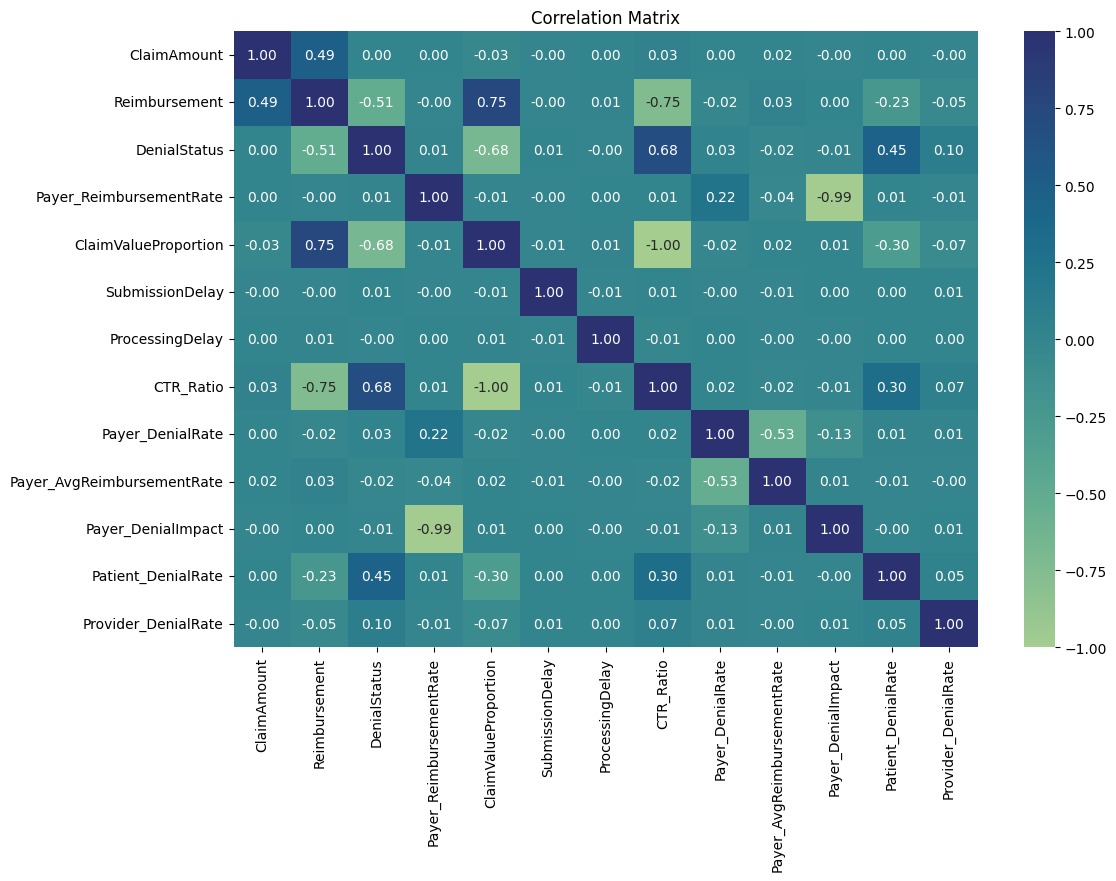

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(claims_corrmatrix,annot=True,cmap='crest',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [41]:
claims_df = claims_df.drop(columns=['CTR_Ratio','ClaimValueProportion','Payer_DenialImpact'])

In [42]:
#Handling missing values
print(patients_df.isnull().sum())
print(claims_df.isnull().sum())
print(payers_df.isnull().sum())
print(providers_df.isnull().sum())
print(revenue_df.isnull().sum())
print(externalfact_df.isnull().sum())

PatientID        0
Age              0
Gender           0
City             0
State            0
InsuranceType    0
dtype: int64
ClaimID                       0
PatientID                     0
PayerID                       0
ProviderID                    0
ClaimAmount                   0
Reimbursement                 0
DenialStatus                  0
ServiceDate                   0
SubmissionDate                0
ProcessedDate                 0
SubmissionQuarter             0
SubmissionMonth               0
SubmissionWeekday             0
ProcessedQuarter              0
ProcessedMonth                0
ProcessedWeekday              0
Payer_ReimbursementRate       0
SubmissionDelay               0
ProcessingDelay               0
Payer_DenialRate              0
Payer_AvgReimbursementRate    0
Patient_DenialRate            0
Provider_DenialRate           0
dtype: int64
PayerID              0
PayerName            0
PayerCategory        0
ReimbursementRate    0
dtype: int64
ProviderID         

In [43]:
#Duplicate values
print(patients_df.duplicated().sum())
print(claims_df.duplicated().sum())
print(payers_df.duplicated().sum())
print(providers_df.duplicated().sum())
print(revenue_df.duplicated().sum())
print(externalfact_df.duplicated().sum())

0
0
0
0
0
0


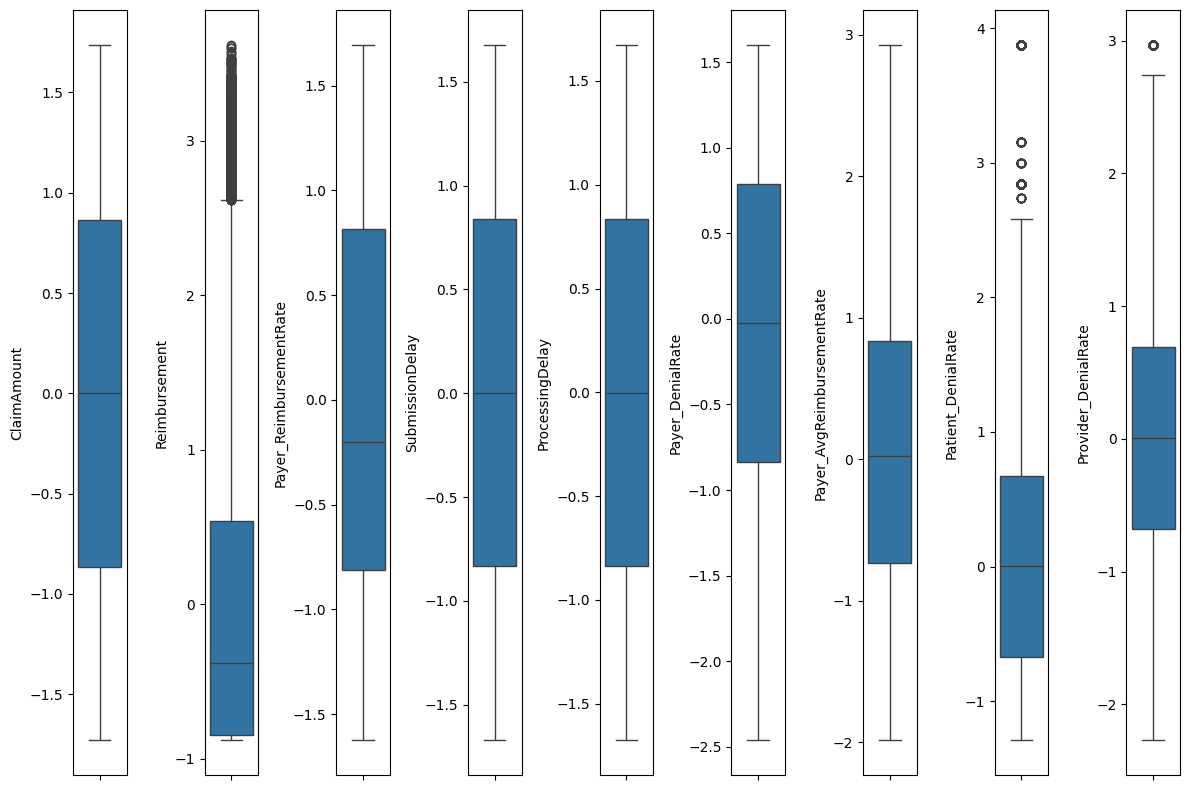

In [44]:
plt.figure(figsize=(12,8))

columns = ['ClaimAmount', 'Reimbursement', 'Payer_ReimbursementRate',
       'SubmissionDelay', 'ProcessingDelay', 'Payer_DenialRate',
       'Payer_AvgReimbursementRate', 
       'Patient_DenialRate', 'Provider_DenialRate']

for i,col in enumerate(columns,1):
    plt.subplot(1,len(columns),i)
    sns.boxplot(y=claims_df[col])
    #plt.title(col)
plt.tight_layout()
plt.show()

In [45]:
for col in ['Reimbursement','Patient_DenialRate', 'Provider_DenialRate']:
    lower_limit = claims_df[col].quantile(0.05)
    upper_limit = claims_df[col].quantile(0.95)
    new_claims_df[col] = claims_df[col].clip(lower=lower_limit, upper=upper_limit)

In [46]:
patients_df['Gender'].value_counts()

Gender
1    5076
0    4924
Name: count, dtype: int64

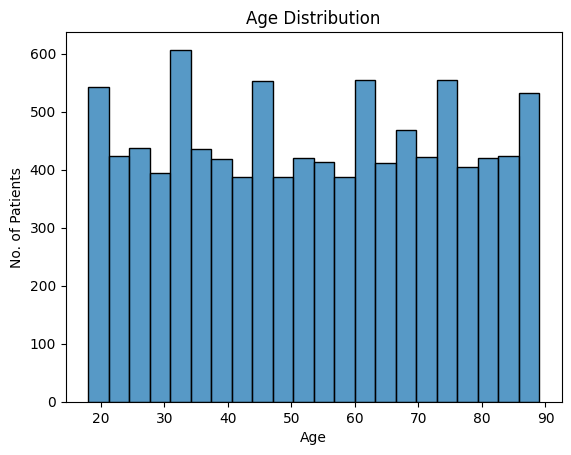

In [47]:
sns.histplot(x='Age',data=orig_patients_df)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("No. of Patients")
plt.show()

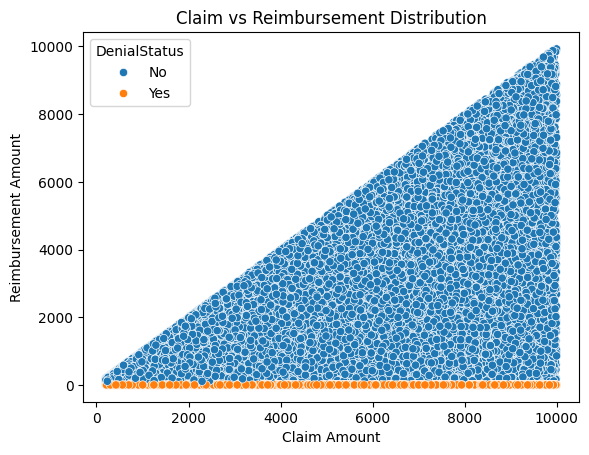

In [48]:
sns.scatterplot(x='ClaimAmount', y='Reimbursement', data=orig_claims_df,hue='DenialStatus')
plt.title("Claim vs Reimbursement Distribution")
plt.xlabel("Claim Amount")
plt.ylabel("Reimbursement Amount")
plt.show()

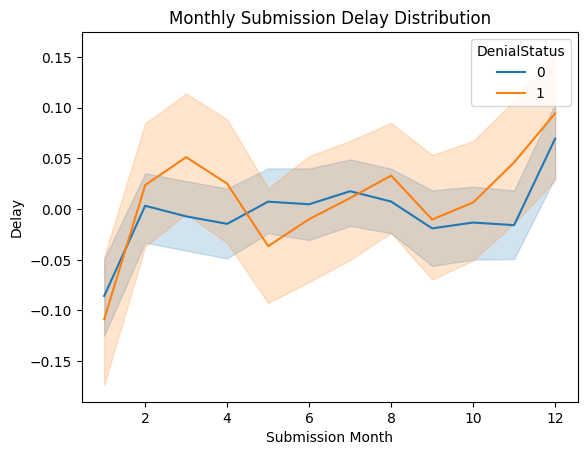

In [49]:
sns.lineplot(x='SubmissionMonth', y='SubmissionDelay', data=claims_df,hue='DenialStatus')
plt.title("Monthly Submission Delay Distribution")
plt.xlabel("Submission Month")
plt.ylabel("Delay")
plt.show()

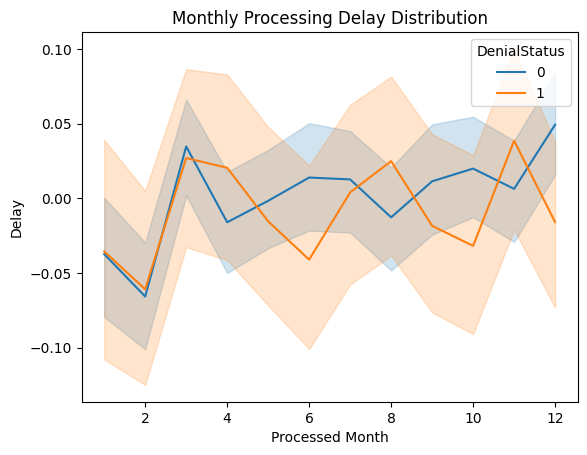

In [50]:
sns.lineplot(x='ProcessedMonth', y='ProcessingDelay', data=claims_df,hue='DenialStatus')
plt.title("Monthly Processing Delay Distribution")
plt.xlabel("Processed Month")
plt.ylabel("Delay")
plt.show()

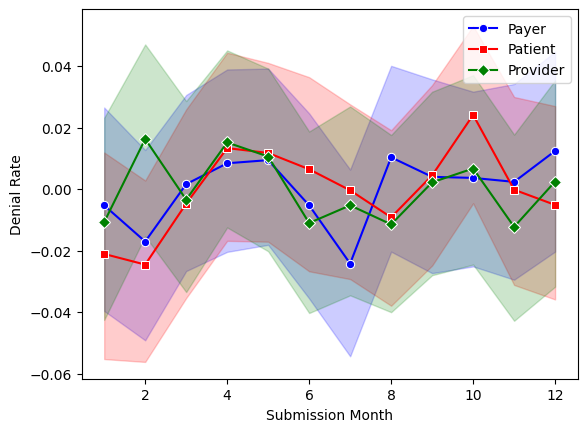

In [51]:
sns.lineplot(x='SubmissionMonth',y='Payer_DenialRate',marker='o',color='blue',label='Payer',data=claims_df)
sns.lineplot(x='SubmissionMonth',y='Patient_DenialRate',marker='s',color='red',label='Patient',data=claims_df)
sns.lineplot(x='SubmissionMonth',y='Provider_DenialRate',marker='D',color='green',label='Provider',data=claims_df)
plt.xlabel("Submission Month")
plt.ylabel("Denial Rate")
plt.show()

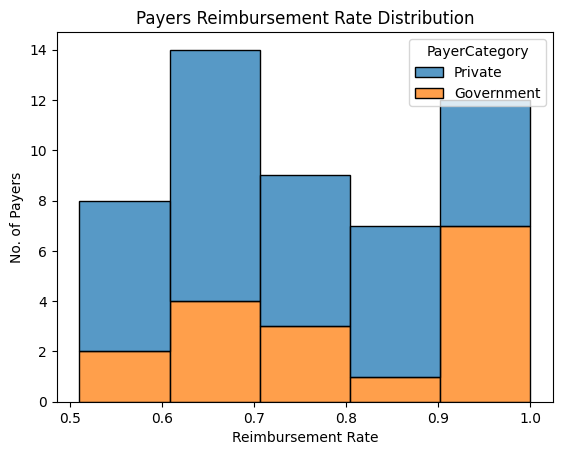

In [52]:
sns.histplot( x='ReimbursementRate', data=orig_payers_df,hue='PayerCategory',multiple='stack',bins=5)
plt.title("Payers Reimbursement Rate Distribution")
plt.xlabel("Reimbursement Rate")
plt.ylabel("No. of Payers")
plt.show()

In [53]:
model_df = claims_df.copy()

In [54]:
model_df['MonthID'] = model_df['ProcessedDate'].dt.to_period('M')

In [55]:
model_df = model_df.merge(patients_df[['PatientID','Age','Gender','InsuranceType']],on='PatientID',how='left')
model_df = model_df.merge(payers_df[['PayerID','PayerCategory']],on='PayerID',how='left')
model_df = model_df.merge(providers_df[['ProviderID','Specialty_Cardiology','Specialty_General Medicine', 'Specialty_Neurology',
       'Specialty_Orthopedics', 'Specialty_Pediatrics']],on='ProviderID',how='left')
model_df = model_df.merge(externalfact_df[['MonthID','InflationRate','PublicEventsEncoded', 'PolicyChangesEncoded']],on='MonthID',how='left')

In [56]:
model_df.drop(columns=['ClaimID', 'PatientID', 'PayerID', 'ProviderID','Reimbursement', 'ServiceDate', 'SubmissionDate',
       'ProcessedDate','MonthID'],axis=1,inplace=True)

In [57]:
corrmat = model_df.corr()

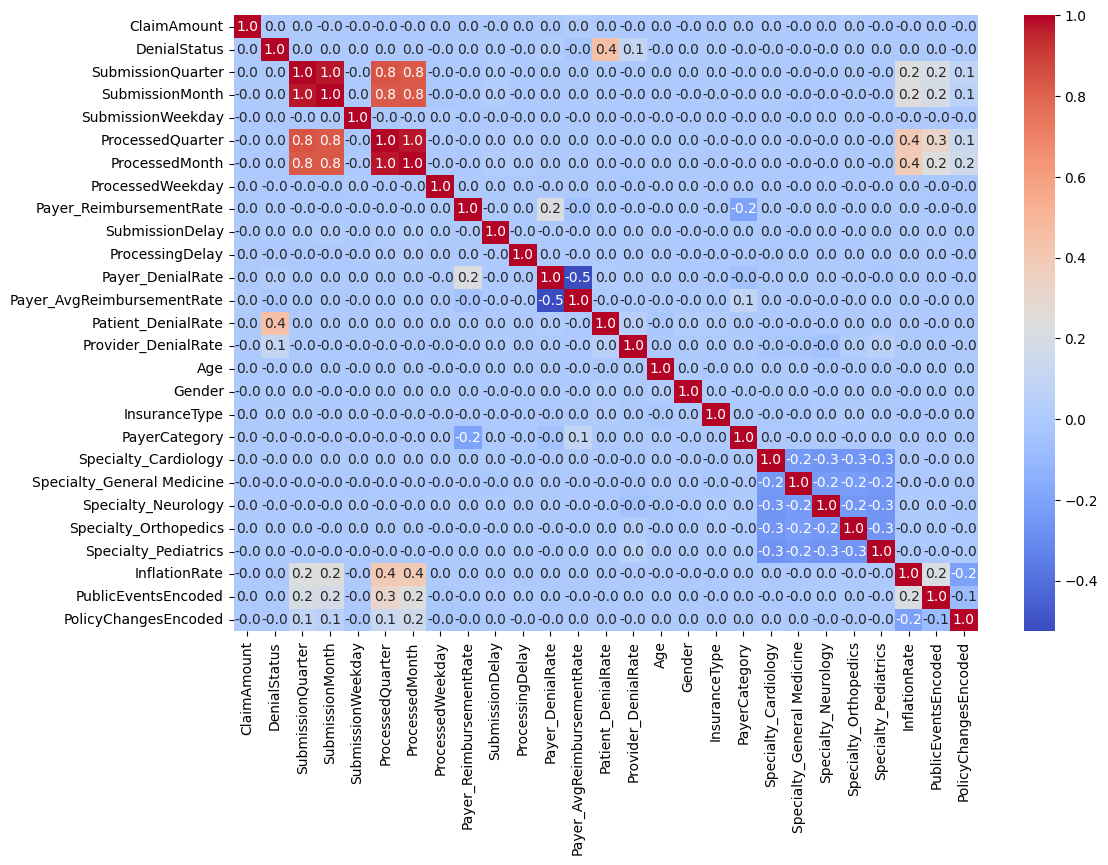

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat,annot=True,fmt='.1f',cmap='coolwarm')
plt.show()

In [59]:
model_df.drop(columns=['SubmissionQuarter','ProcessedQuarter','SubmissionQuarter','ProcessedQuarter'],axis=1,inplace=True)

In [60]:
corrmat1 = model_df.corr()

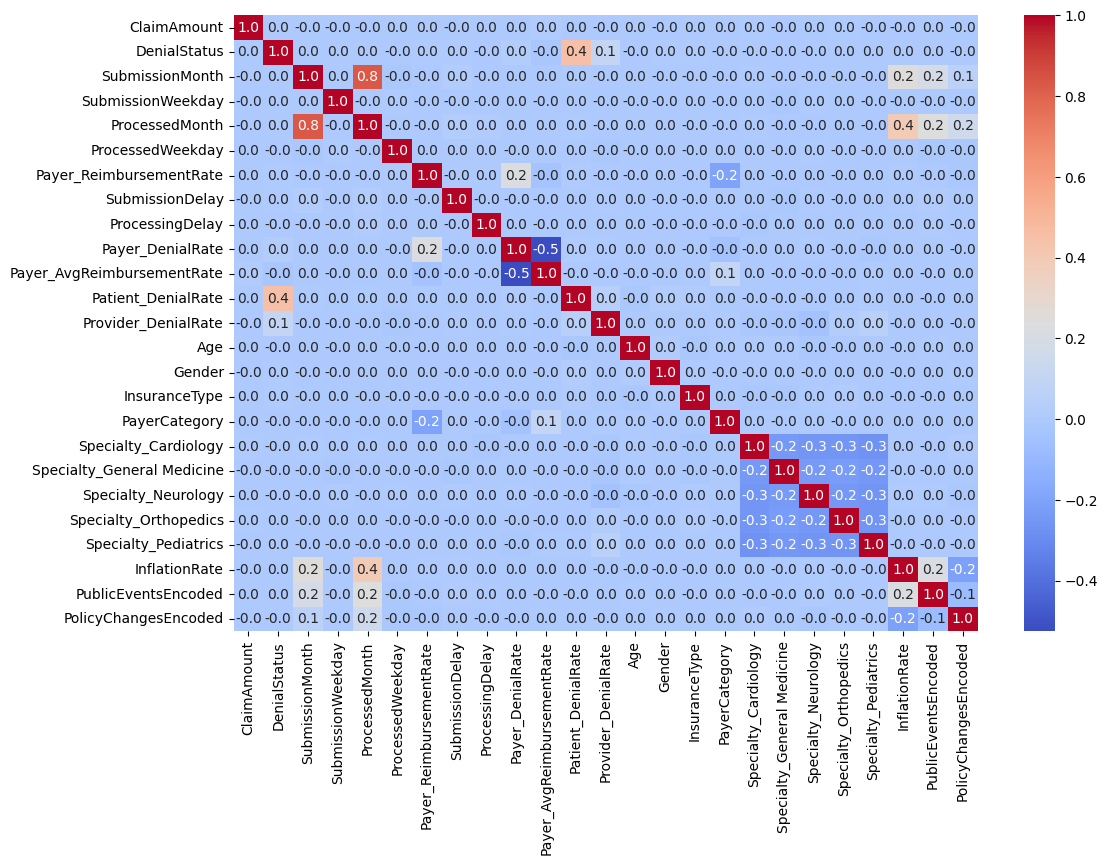

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat1,annot=True,fmt='.1f',cmap='coolwarm')
plt.show()

**Feature Selection**

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = model_df[['ClaimAmount', 'SubmissionMonth', 'SubmissionWeekday',
       'ProcessedMonth', 'ProcessedWeekday', 'Payer_ReimbursementRate',
       'SubmissionDelay', 'ProcessingDelay', 'Payer_DenialRate',
       'Payer_AvgReimbursementRate', 'Patient_DenialRate',
       'Provider_DenialRate', 'Age', 'Gender', 'InsuranceType',
       'PayerCategory', 'Specialty_Cardiology', 'Specialty_General Medicine',
       'Specialty_Neurology', 'Specialty_Orthopedics', 'Specialty_Pediatrics',
       'InflationRate', 'PublicEventsEncoded', 'PolicyChangesEncoded']]
y= model_df['DenialStatus']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf_model =RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_df = pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_df.sort_values(by='Importance',ascending=False,inplace=True)
print(feature_df)

                       Feature  Importance
10          Patient_DenialRate    0.222905
0                  ClaimAmount    0.085484
12                         Age    0.073760
6              SubmissionDelay    0.064001
7              ProcessingDelay    0.062831
11         Provider_DenialRate    0.058634
9   Payer_AvgReimbursementRate    0.053777
5      Payer_ReimbursementRate    0.048797
21               InflationRate    0.044824
2            SubmissionWeekday    0.040521
4             ProcessedWeekday    0.040022
1              SubmissionMonth    0.038957
3               ProcessedMonth    0.035249
8             Payer_DenialRate    0.023711
22         PublicEventsEncoded    0.012883
13                      Gender    0.012873
14               InsuranceType    0.012076
15               PayerCategory    0.010923
18         Specialty_Neurology    0.009977
19       Specialty_Orthopedics    0.009848
20        Specialty_Pediatrics    0.009579
16        Specialty_Cardiology    0.009494
17  Special

**MultiCollinearity Check**

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['Feature'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df.sort_values(by='VIF',ascending=False,inplace=True)
print(vif_df)


                       Feature       VIF
20        Specialty_Pediatrics  6.238347
16        Specialty_Cardiology  6.123449
19       Specialty_Orthopedics  5.854169
18         Specialty_Neurology  5.784291
17  Specialty_General Medicine  5.437576
3               ProcessedMonth  3.970959
1              SubmissionMonth  3.338637
8             Payer_DenialRate  1.472235
9   Payer_AvgReimbursementRate  1.411612
21               InflationRate  1.357646
23        PolicyChangesEncoded  1.180805
5      Payer_ReimbursementRate  1.109271
22         PublicEventsEncoded  1.087763
15               PayerCategory  1.054045
11         Provider_DenialRate  1.007189
10          Patient_DenialRate  1.003592
7              ProcessingDelay  1.002147
13                      Gender  1.000928
6              SubmissionDelay  1.000902
4             ProcessedWeekday  1.000894
14               InsuranceType  1.000890
0                  ClaimAmount  1.000759
12                         Age  1.000738
2            Sub

In [64]:
model_df.drop(columns=['Specialty_Cardiology', 'Specialty_General Medicine',
       'Specialty_Neurology', 'Specialty_Orthopedics', 'Specialty_Pediatrics'],inplace=True)

In [65]:
model_df['DenialStatus'].value_counts()

DenialStatus
0    37500
1    12500
Name: count, dtype: int64

**Handling Imbalanced Data**

In [66]:
from imblearn.over_sampling import SMOTE

X = model_df[['ClaimAmount', 'SubmissionMonth', 'SubmissionWeekday',
       'ProcessedMonth', 'ProcessedWeekday', 'Payer_ReimbursementRate',
       'SubmissionDelay', 'ProcessingDelay', 'Payer_DenialRate',
       'Payer_AvgReimbursementRate', 'Patient_DenialRate',
       'Provider_DenialRate', 'Age', 'Gender', 'InsuranceType',
       'PayerCategory','InflationRate', 'PublicEventsEncoded', 'PolicyChangesEncoded']]
y= model_df['DenialStatus']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: DenialStatus
0    29965
1    10035
Name: count, dtype: int64
After SMOTE: DenialStatus
0    29965
1    29965
Name: count, dtype: int64


In [67]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix


model = XGBClassifier(
    random_state = 42,
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    learning_rate = 0.1,
    max_depth = 6,
    n_estimators = 100,
)

model.fit(X_train_resampled,y_train_resampled)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# AUC-ROC Score
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob))
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.56      0.69      7535
           1       0.38      0.81      0.52      2465

    accuracy                           0.62     10000
   macro avg       0.64      0.69      0.60     10000
weighted avg       0.77      0.62      0.65     10000

AUC-ROC Score: 0.7722582781367815
Confusion Matrix:
 [[4236 3299]
 [ 458 2007]]


In [68]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                       Feature  Importance
10          Patient_DenialRate    0.437787
8             Payer_DenialRate    0.148559
11         Provider_DenialRate    0.086754
15               PayerCategory    0.060168
13                      Gender    0.051851
14               InsuranceType    0.030026
5      Payer_ReimbursementRate    0.029113
9   Payer_AvgReimbursementRate    0.017786
7              ProcessingDelay    0.016113
3               ProcessedMonth    0.015155
6              SubmissionDelay    0.014113
4             ProcessedWeekday    0.013662
16               InflationRate    0.013592
12                         Age    0.012340
0                  ClaimAmount    0.012214
17         PublicEventsEncoded    0.011744
2            SubmissionWeekday    0.011118
1              SubmissionMonth    0.009661
18        PolicyChangesEncoded    0.008242


In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 150],
    'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Hyperparameters:\n", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Hyperparameters:
 {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'scale_pos_weight': 1}


In [71]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
print("Cross-Validation AUC-ROC Scores:", cv_scores)
print("Mean AUC-ROC Score:", cv_scores.mean())

y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

print("Final Test AUC-ROC:", roc_auc_score(y_test, y_test_pred_prob))
print("Final Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-Validation AUC-ROC Scores: [0.78869478 0.85302328 0.99443285 0.99482103 0.99510649]
Mean AUC-ROC Score: 0.9252156883960149
Final Test AUC-ROC: 0.7669970159539458
Final Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      7535
           1       0.53      0.36      0.43      2465

    accuracy                           0.76     10000
   macro avg       0.67      0.63      0.64     10000
weighted avg       0.74      0.76      0.75     10000

Confusion Matrix:
 [[4236 3299]
 [ 458 2007]]


In [74]:
import xgboost as xgb
X_train_resampled['CombinedDenialRate'] = (
    X_train_resampled['Payer_DenialRate'] + X_train_resampled['Provider_DenialRate']
)
X_test['CombinedDenialRate'] = (
    X_test['Payer_DenialRate'] + X_test['Provider_DenialRate']
)


dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 2,
    #'n_estimators': 100,
    'reg_alpha': 1,  # L1 regularization
    'reg_lambda': 2,  # L2 regularization
    'eval_metric': 'auc',
    'random_state': 42
}

# Train model with early stopping
early_stopping_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtest, 'validation')],
    early_stopping_rounds=10
)


# Final Evaluation
y_test_pred_prob1 = early_stopping_model.predict(dtest)
final_auc = roc_auc_score(y_test, y_test_pred_prob1 > 0.5)
print("Final Test AUC-ROC:", final_auc)
print("Final Classification Report:\n", classification_report(y_test, (y_test_pred_prob1 > 0.5).astype(int)))

[0]	validation-auc:0.75710
[1]	validation-auc:0.75997
[2]	validation-auc:0.76205
[3]	validation-auc:0.76884
[4]	validation-auc:0.76884
[5]	validation-auc:0.76884
[6]	validation-auc:0.76884
[7]	validation-auc:0.77358
[8]	validation-auc:0.77358
[9]	validation-auc:0.77356
[10]	validation-auc:0.77356
[11]	validation-auc:0.77636
[12]	validation-auc:0.77868
[13]	validation-auc:0.77878
[14]	validation-auc:0.77878
[15]	validation-auc:0.78016
[16]	validation-auc:0.78009
[17]	validation-auc:0.78013
[18]	validation-auc:0.78048
[19]	validation-auc:0.78051
[20]	validation-auc:0.78024
[21]	validation-auc:0.78016
[22]	validation-auc:0.78043
[23]	validation-auc:0.77958
[24]	validation-auc:0.77995
[25]	validation-auc:0.78024
[26]	validation-auc:0.77953
[27]	validation-auc:0.77937
[28]	validation-auc:0.77936
[29]	validation-auc:0.77943
Final Test AUC-ROC: 0.697560673584126
Final Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.61      0.72    

In [98]:
# Compute cost-weighted metrics
false_negatives_xgb = ((y_test == 1) & (y_test_pred_prob1 == 0)).sum()
false_positives_xgb = ((y_test == 0) & (y_test_pred_prob1 == 1)).sum()

cost_of_false_negative = 1000  # Example cost of missing a denied claim
cost_of_false_positive = 100  # Example cost of incorrect denial prediction

total_cost = (false_negatives_xgb * cost_of_false_negative) + (false_positives_xgb * cost_of_false_positive)
print("Total Cost of Errors:", total_cost)

Total Cost of Errors: 0


In [79]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Train Balanced Random Forest
brf_model = BalancedRandomForestClassifier(
    random_state=42, 
    n_estimators=100,
    max_depth = 2,
    class_weight= 'balanced',
    verbose=0
)
brf_model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate Model on Business Metrics
from sklearn.metrics import recall_score

# Evaluate recall for denied claims
brf_y_pred = brf_model.predict(X_test)
brf_recall = recall_score(y_test, brf_y_pred, pos_label=1)
final_brf_auc = roc_auc_score(y_test, brf_y_pred > 0.5)
print("Final Test AUC-ROC:", final_brf_auc)
print("Recall for Class 1 (Denied Claims) - BRF:", brf_recall)
print("Final Classification Report:\n", classification_report(y_test, (brf_y_pred > 0.5).astype(int)))

Final Test AUC-ROC: 0.6873108724532304
Recall for Class 1 (Denied Claims) - BRF: 0.7626774847870182
Final Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.61      0.72      7535
           1       0.39      0.76      0.52      2465

    accuracy                           0.65     10000
   macro avg       0.64      0.69      0.62     10000
weighted avg       0.77      0.65      0.67     10000



In [80]:
# Compute cost-weighted metrics
false_negatives = ((y_test == 1) & (brf_y_pred == 0)).sum()
false_positives = ((y_test == 0) & (brf_y_pred == 1)).sum()

cost_of_false_negative = 1000  # Example cost of missing a denied claim
cost_of_false_positive = 100  # Example cost of incorrect denial prediction

total_cost = (false_negatives * cost_of_false_negative) + (false_positives * cost_of_false_positive)
print("Total Cost of Errors:", total_cost)

Total Cost of Errors: 877400


In [81]:
# Train CatBoost Classifier
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.01,
    depth=2,
    random_seed=42,
    auto_class_weights='Balanced',
    verbose=0
)
catboost_model.fit(X_train_resampled, y_train_resampled)

catboost_y_pred = catboost_model.predict(X_test)
catboost_recall = recall_score(y_test, catboost_y_pred, pos_label=1)
final_catboost_auc = roc_auc_score(y_test, catboost_y_pred > 0.5)
print("Final Test AUC-ROC:", final_catboost_auc)
print("Recall for Class 1 (Denied Claims) - CatBoost:", catboost_recall)
print("Final Classification Report:\n", classification_report(y_test, (catboost_y_pred > 0.5).astype(int)))

Final Test AUC-ROC: 0.7011168973458546
Recall for Class 1 (Denied Claims) - CatBoost: 0.7630831643002028
Final Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.74      7535
           1       0.41      0.76      0.53      2465

    accuracy                           0.67     10000
   macro avg       0.65      0.70      0.64     10000
weighted avg       0.77      0.67      0.69     10000



In [82]:
# Compute cost-weighted metrics
false_negatives = ((y_test == 1) & (catboost_y_pred == 0)).sum()
false_positives = ((y_test == 0) & (catboost_y_pred == 1)).sum()

cost_of_false_negative = 1000  # Example cost of missing a denied claim
cost_of_false_positive = 100  # Example cost of incorrect denial prediction

total_cost = (false_negatives * cost_of_false_negative) + (false_positives * cost_of_false_positive)
print("Total Cost of Errors:", total_cost)

Total Cost of Errors: 855900


**High Risk Claims**

In [91]:
X_test['DeinalProbability'] = y_test_pred_prob1

X_test['RiskLevel'] = pd.cut(
    X_test['DeinalProbability'],
    bins=[0,0.3,0.7,1],
    labels = ['Low','Medium','High'],
    include_lowest=True
)

high_risk_claims = X_test[X_test['RiskLevel'] == 'High']

In [92]:
risk_distribution = X_test['RiskLevel'].value_counts()
risk_distribution

RiskLevel
Medium    5766
Low       2819
High      1415
Name: count, dtype: int64

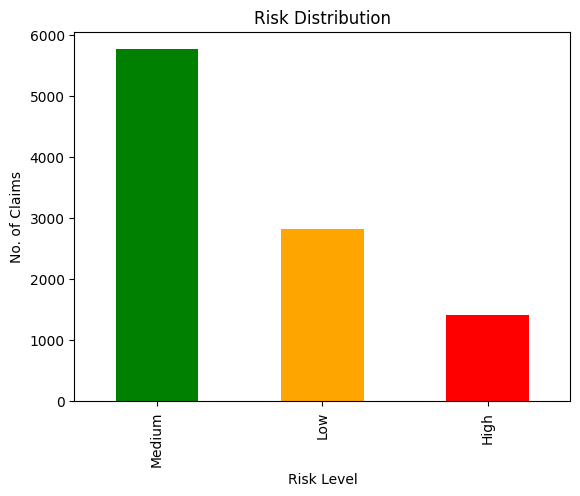

In [93]:
risk_distribution.plot(kind='bar',color=['Green','Orange','Red'])
plt.title("Risk Distribution")
plt.ylabel("No. of Claims")
plt.xlabel("Risk Level")
plt.show()

In [94]:
monthly_highclaims = high_risk_claims.groupby('SubmissionMonth')['RiskLevel'].count().reset_index()

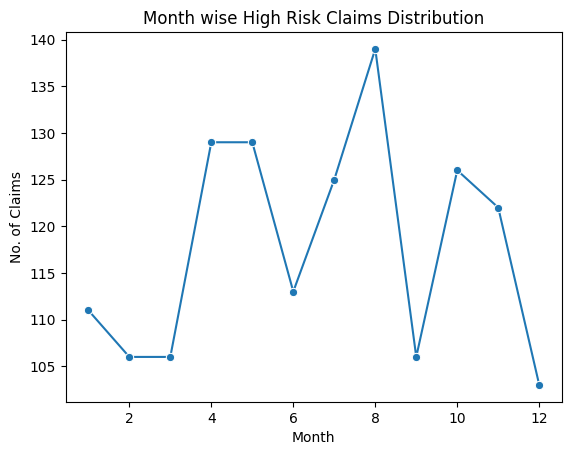

In [95]:
sns.lineplot(x='SubmissionMonth',y='RiskLevel',data=monthly_highclaims,marker='o')
plt.title("Month wise High Risk Claims Distribution")
plt.xlabel("Month")
plt.ylabel("No. of Claims")
plt.show()

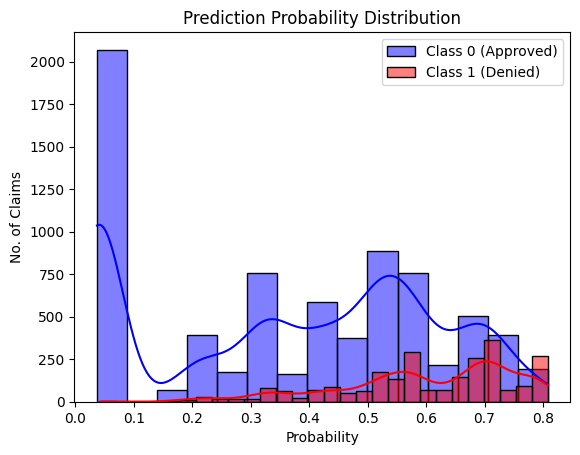

In [96]:
sns.histplot(y_test_pred_prob1[y_test == 0], color='blue', label='Class 0 (Approved)', kde=True)
sns.histplot(y_test_pred_prob1[y_test == 1], color='red', label='Class 1 (Denied)', kde=True)
plt.title("Prediction Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("No. of Claims")
plt.legend()
plt.show()